### Import Data & Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)

# this data set link :https://www.kaggle.com/datasets/maddraf/sbanational-csv

In [5]:
sba = pd.read_csv('SBAnational.csv')
sba.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_328\2714086130.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sba = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [6]:
sba.shape

(899164, 27)

## Exploratory Data Analysis

In [8]:
sba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [9]:
sba.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [10]:
sba.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [11]:
list_item = []
for col in sba.columns:
    list_item.append([col, sba[col].dtype, sba[col].isna().sum(), round((sba[col].isna().sum()/len(sba[col]))*100,2),
                      sba[col].nunique(), list(sba[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [12]:
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,LoanNr_ChkDgt,int64,0,0.00,899164,"[3886574004, 8407993001, 1699395000, 263446600..."
1,Name,object,14,0.00,779583,"[CONTINENTAL MAPPING CONSULTANT, Rickey A La F..."
2,City,object,30,0.00,32581,"[MESA, SHERMAN OAKS, Flagstaff, PLYMOUTH, LIVE..."
3,State,object,14,0.00,51,"[CA, NY, NJ, NV]"
4,Zip,int64,0,0.00,33611,"[90731, 75048, 54901, 84094, 93304]"
5,Bank,object,1559,0.17,5802,"[CITY NATIONAL BANK, GOVERMNET FUNDING CALBIDC..."
6,BankState,object,1566,0.17,56,"[RI, OH, IL, NC]"
7,NAICS,int64,0,0.00,1312,"[522298, 561439, 115114, 812990, 423820]"
8,ApprovalDate,object,0,0.00,9859,"[14-Jun-06, 13-Sep-90, 15-Feb-90, 17-Jul-91, 1..."
9,ApprovalFY,object,0,0.00,70,"[2006, 2008, 1997, 2005]"


In [13]:
def outliers(DataFrame,Series):
    iqr = Series.quantile(.75) - Series.quantile(.25)
    lower_bound = Series.quantile(.25) - (1.5*iqr)
    upper_bound = Series.quantile(.75) + (1.5*iqr)
    return DataFrame[(Series >= upper_bound) | (Series <= lower_bound)]

In [14]:
# Persentasi Outliers NoEmp Feature
print(f'Persentase outliers: {round(len(outliers(sba,sba.NoEmp))/len(sba.NoEmp)*100,2)}%')

Persentase outliers: 11.39%


In [15]:
sns.barplot(x=sba.MIS_Status, y=sba['NoEmp'])

<Axes: xlabel='MIS_Status', ylabel='NoEmp'>

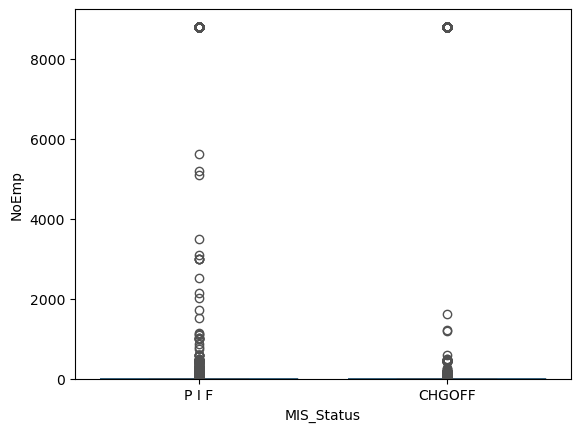

In [16]:
sns.boxplot(x=sba['MIS_Status'], y=sba['CreateJob'])

# Show the plot
plt.show()

In [17]:
print(f'Persentase outliers: {round(len(outliers(sba,sba.CreateJob))/len(sba.CreateJob)*100,2)}%')

Persentase outliers: 16.56%


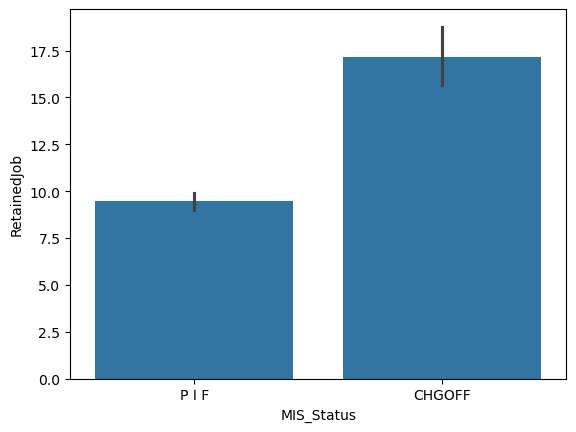

In [18]:
sns.barplot(x=sba.MIS_Status,y=sba.RetainedJob)
plt.show()

In [19]:
# Persentasi Outliers RetainedJob Feature
print(f'Persentase outliers: {round(len(outliers(sba,sba.RetainedJob))/len(sba.CreateJob)*100,2)}%')

Persentase outliers: 11.8%


In [20]:
sba[['NoEmp','CreateJob','RetainedJob']].corr()

,NoEmp,CreateJob,RetainedJob
NoEmp,1.000000,0.008626,0.015350
CreateJob,0.008626,1.000000,0.993953
RetainedJob,0.015350,0.993953,1.000000


In [21]:
sba.NewExist.unique()

array([ 2.,  1.,  0., nan])

In [22]:
sba[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv','SBA_Appv']]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...
899159,"$70,000.00",$0.00,$0.00,"$70,000.00","$56,000.00"
899160,"$85,000.00",$0.00,$0.00,"$85,000.00","$42,500.00"
899161,"$300,000.00",$0.00,$0.00,"$300,000.00","$225,000.00"
899162,"$75,000.00",$0.00,"$46,383.00","$75,000.00","$60,000.00"


In [23]:
sba.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [24]:
# Drop unused feature
data = sba.drop(['LoanNr_ChkDgt', 'Name','City', 'State', 'Zip','Bank','BankState','ApprovalDate','ApprovalFY',
                 'NoEmp','CreateJob','RetainedJob','FranchiseCode','UrbanRural', 'ChgOffDate','DisbursementDate','BalanceGross',
                 'DisbursementGross','ChgOffPrinGr'], axis=1)

In [25]:
data

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,451120,84,2.0,N,Y,P I F,"$60,000.00","$48,000.00"
1,722410,60,2.0,N,Y,P I F,"$40,000.00","$32,000.00"
2,621210,180,1.0,N,N,P I F,"$287,000.00","$215,250.00"
3,0,60,1.0,N,Y,P I F,"$35,000.00","$28,000.00"
4,0,240,1.0,N,N,P I F,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...
899159,451120,60,1.0,0,N,P I F,"$70,000.00","$56,000.00"
899160,451130,60,1.0,Y,N,P I F,"$85,000.00","$42,500.00"
899161,332321,108,1.0,N,N,P I F,"$300,000.00","$225,000.00"
899162,0,60,1.0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


In [26]:
data.MIS_Status.value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

## 2. Data Cleaning

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NAICS       899164 non-null  int64  
 1   Term        899164 non-null  int64  
 2   NewExist    899028 non-null  float64
 3   RevLineCr   894636 non-null  object 
 4   LowDoc      896582 non-null  object 
 5   MIS_Status  897167 non-null  object 
 6   GrAppv      899164 non-null  object 
 7   SBA_Appv    899164 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 54.9+ MB


In [29]:
data.dropna(inplace=True)


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889938 entries, 0 to 899163
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NAICS       889938 non-null  int64  
 1   Term        889938 non-null  int64  
 2   NewExist    889938 non-null  float64
 3   RevLineCr   889938 non-null  object 
 4   LowDoc      889938 non-null  object 
 5   MIS_Status  889938 non-null  object 
 6   GrAppv      889938 non-null  object 
 7   SBA_Appv    889938 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 61.1+ MB


### **Categorical Data Cleaning**

In [32]:
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col]))*100,2),
                      data[col].nunique(), list(data[col].sample(5).drop_duplicates().values)])

dataDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [33]:
dataDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,NAICS,int64,0,0.0,1311,"[444190, 541490, 326299, 531390, 0]"
1,Term,int64,0,0.0,411,"[246, 96, 84, 60, 240]"
2,NewExist,float64,0,0.0,3,[1.0]
3,RevLineCr,object,0,0.0,18,"[N, Y]"
4,LowDoc,object,0,0.0,8,[N]
5,MIS_Status,object,0,0.0,2,[P I F]
6,GrAppv,object,0,0.0,21958,"[$10,000.00 , $160,000.00 , $60,895.00 , $36,0..."
7,SBA_Appv,object,0,0.0,38033,"[$15,000.00 , $290,250.00 , $487,500.00 , $534..."


In [34]:
for x in data[['NewExist', 'RevLineCr','LowDoc','MIS_Status']].columns:
    print(f'{x}: \n{data[x].unique()}\n')

NewExist: 
[2. 1. 0.]

RevLineCr: 
['N' '0' 'Y' 'T' '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-' 'Q']

LowDoc: 
['Y' 'N' 'C' '1' 'S' 'R' 'A' '0']

MIS_Status: 
['P I F' 'CHGOFF']



In [35]:
data[data['NAICS']==0]

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
3,0,60,1.0,N,Y,P I F,"$35,000.00","$28,000.00"
4,0,240,1.0,N,N,P I F,"$229,000.00","$229,000.00"
6,0,45,2.0,N,N,CHGOFF,"$600,000.00","$499,998.00"
9,0,84,2.0,N,Y,P I F,"$70,000.00","$56,000.00"
13,0,120,2.0,N,N,P I F,"$370,000.00","$277,500.00"
...,...,...,...,...,...,...,...,...
899153,0,119,1.0,0,N,CHGOFF,"$142,000.00","$106,500.00"
899154,0,60,1.0,0,N,P I F,"$10,000.00","$5,000.00"
899158,0,84,2.0,N,Y,P I F,"$79,000.00","$63,200.00"
899162,0,60,1.0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


In [36]:
data.NAICS
NAICSTrue = 0
NAICSFalse = 0
for i in data.NAICS.astype(str):
    if len(i) == 6:
        NAICSTrue += 1
    else:
        NAICSFalse += 1
print(NAICSTrue)
print(NAICSFalse)

690456
199482


In [37]:
data = data[data.NAICS != 0]

In [38]:
data.NewExist.value_counts()

NewExist
1.0    498467
2.0    191260
0.0       729
Name: count, dtype: int64

In [39]:
data = data[(data.NewExist == 1.0) | (data.NewExist == 2.0)]
data.NewExist.value_counts()

NewExist
1.0    498467
2.0    191260
Name: count, dtype: int64

In [40]:
data.RevLineCr.value_counts()

RevLineCr
N    267411
0    214032
Y    193682
T     14557
1        14
R        14
`         5
2         5
C         2
,         1
7         1
A         1
-         1
Q         1
Name: count, dtype: int64

In [41]:
data = data[(data.RevLineCr == 'Y') | (data.RevLineCr == 'N')]
data.RevLineCr.value_counts()

RevLineCr
N    267411
Y    193682
Name: count, dtype: int64

In [42]:
data.LowDoc.value_counts()

LowDoc
N    434155
Y     25142
S       565
C       557
0       512
A       104
R        57
1         1
Name: count, dtype: int64

In [43]:
data = data[(data.LowDoc == 'Y') | (data.LowDoc == 'N')]
data.LowDoc.value_counts()

LowDoc
N    434155
Y     25142
Name: count, dtype: int64

### Data Type Standardization


In [45]:
def currencyCleaning(x):
    x = x[1:].replace(',','')
    return x

In [46]:
data['GrAppv'] = data['GrAppv'].apply(currencyCleaning).astype(float).astype(int)
data['SBA_Appv'] = data['SBA_Appv'].apply(currencyCleaning).astype(float).astype(int)

## 3. Feature Engineering

- 11 : Agriculture, forestry, fishing and hunting
- 21 : Mining, quarrying, and oil and gas extraction
- 22 : Utilities
- 23 : Construction
- 31-33 : Manufacturing
- 42 : Wholesale trade
- 44-45 : Retail trade
- 48-49 : Transportation and warehousing
- 51 : Information
- 52 : Finance and insurance
- 53 : Real estate and rental and leasing
- 54 : Professional, scientific, and technical services
- 55 : Management of companies and enterprises
- 56 : Administrative/support & waste management/remediation Service
- 61 : Educational services
- 62 : Health care and social assistance
- 71 : Arts, entertainment, and recreation
- 72 : Accommodation and food services
- 81 : Other services (except public administration)
- 92 : Public administration

In [49]:
# Join NAICS with similar industry
def naicsEngineering(x):
    x = str(x)
    x = x[:2]
    if (x == '31') | (x == '32') | (x == '33'):
        x = '31-33'
    elif (x == '44') | (x == '45'):
        x = '44-45'
    elif (x == '48') | (x == '49'):
        x = '48-49'
    return x

In [50]:
data.NAICS = data.NAICS.apply(naicsEngineering)

In [51]:
data

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,44-45,84,2.0,N,Y,P I F,60000,48000
1,72,60,2.0,N,Y,P I F,40000,32000
2,62,180,1.0,N,N,P I F,287000,215250
5,31-33,120,1.0,N,N,P I F,517000,387750
7,81,84,2.0,N,Y,P I F,45000,36000
...,...,...,...,...,...,...,...,...
899145,23,60,1.0,Y,N,P I F,25000,12500
899146,31-33,240,1.0,N,N,P I F,189000,189000
899157,31-33,36,1.0,N,N,P I F,200000,150000
899160,44-45,60,1.0,Y,N,P I F,85000,42500


In [52]:
# get dummy
NAICS = pd.get_dummies(data['NAICS'], prefix='NAICS', drop_first=False)
RevLineCr = pd.get_dummies(data['RevLineCr'], drop_first=True)
LowDoc = pd.get_dummies(data['LowDoc'], drop_first=True)
MIS_Status = pd.get_dummies(data['MIS_Status'], drop_first=True)

In [53]:
data.drop(['NAICS', 'RevLineCr', 'LowDoc', 'MIS_Status'], axis=1, inplace=True)

In [54]:
data['RevLineCr'] = RevLineCr['Y']
data['LowDoc'] = LowDoc['Y']
data = pd.concat([data,NAICS,MIS_Status], axis=1)

In [55]:
data = data.rename(columns={'P I F':'Approve'})


In [56]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# List of columns to apply label encoding
columns_to_encode = [
    'RevLineCr', 'LowDoc','NAICS_11', 'NAICS_21', 'NAICS_22', 'NAICS_23', 'NAICS_31-33',
    'NAICS_42', 'NAICS_44-45', 'NAICS_48-49', 'NAICS_51', 'NAICS_52', 'NAICS_53', 'NAICS_54',
    'NAICS_55', 'NAICS_56', 'NAICS_61', 'NAICS_62', 'NAICS_71', 'NAICS_72', 'NAICS_81',
    'NAICS_92', 'Approve'
]

# Apply label encoding
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])


In [57]:
data

,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,NAICS_44-45,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,84,2.0,60000,48000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,60,2.0,40000,32000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,180,1.0,287000,215250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,120,1.0,517000,387750,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,84,2.0,45000,36000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,60,1.0,25000,12500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
899146,240,1.0,189000,189000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
899157,36,1.0,200000,150000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
899160,60,1.0,85000,42500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [341]:
data.to_csv('new_data.csv', index=False)



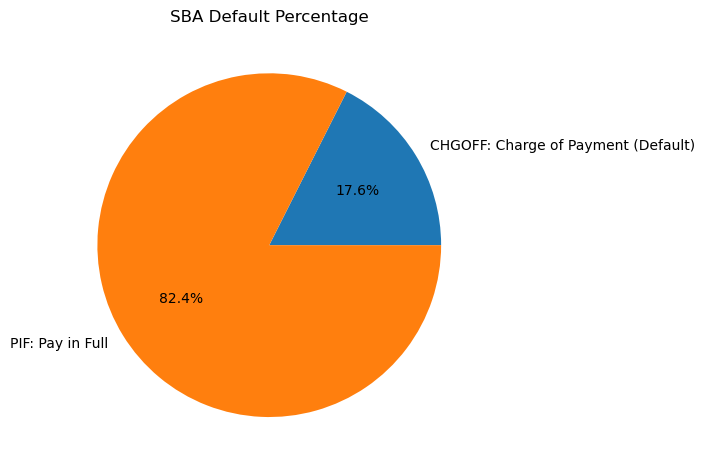

In [58]:
pieSBA = sba.groupby('MIS_Status').count()
values = pieSBA['LoanNr_ChkDgt']
labels = ['CHGOFF: Charge of Payment (Default)', 'PIF: Pay in Full']
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.title('SBA Default Percentage')
plt.tight_layout()
plt.show()

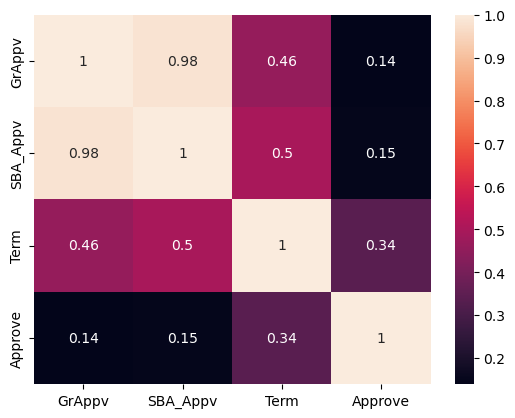

In [59]:
sns.heatmap(data[['GrAppv','SBA_Appv','Term','Approve']].corr(), annot=True)
plt.show()

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


%matplotlib inline

In [61]:
target = data.Approve
data.drop(['Approve'], axis=1, inplace=True)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.20, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((367437, 26), (91860, 26), (367437,), (91860,))

### 1.Logestic Regression


In [64]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred=logreg.predict(X_test)

In [293]:
print("logestic Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

logestic Accuracy: 0.803015458306118
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.27      0.37     19783
           1       0.83      0.95      0.88     72077

    accuracy                           0.80     91860
   macro avg       0.71      0.61      0.63     91860
weighted avg       0.78      0.80      0.77     91860



In [67]:
tnlogreg, fplogreg, fnlogreg, tplogreg = confusion_matrix(y_test, y_pred).ravel()
confusion_matrix(y_test, y_pred)

array([[ 5420, 14363],
       [ 3732, 68345]], dtype=int64)

### 2.SGD Classifier

In [69]:
sgd = SGDClassifier(loss='log_loss')
sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [70]:
y_pred_sgd = sgd.predict(X_test)

In [71]:
print("sgd Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("Classification Report:\n", classification_report(y_test, y_pred_sgd))

sgd Accuracy: 0.7836054866100588
Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.00      0.00     19783
           1       0.78      1.00      0.88     72077

    accuracy                           0.78     91860
   macro avg       0.41      0.50      0.44     91860
weighted avg       0.62      0.78      0.69     91860



In [72]:
tnsgd, fpsgd, fnsgd, tpsgd = confusion_matrix(y_test, y_pred_sgd).ravel()
confusion_matrix(y_test, y_pred_sgd)

array([[    4, 19779],
       [   99, 71978]], dtype=int64)

### 3.DecisionTreeClassifier

In [74]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=42)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [75]:
y_preds_dtree=dtree.predict(X_test)

In [76]:
print("decision tree Accuracy:", accuracy_score(y_test, y_preds_dtree))
print("Classification Report:\n", classification_report(y_test, y_preds_dtree))

decision tree Accuracy: 0.9171674286958414
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     19783
           1       0.95      0.95      0.95     72077

    accuracy                           0.92     91860
   macro avg       0.88      0.88      0.88     91860
weighted avg       0.92      0.92      0.92     91860



In [77]:
tpdtc, tndtc, fpdtc, fndtc = confusion_matrix(y_test, y_preds_dtree).ravel()
confusion_matrix(y_test, y_preds_dtree)

array([[15981,  3802],
       [ 3807, 68270]], dtype=int64)

### 4.RandomForestClassifier

In [79]:
rf = RandomForestClassifier(criterion='gini')
rf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_pred_rf=rf.predict(X_test)

In [81]:
print("Randomforest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Randomforest Accuracy: 0.9241780971042891
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82     19783
           1       0.94      0.96      0.95     72077

    accuracy                           0.92     91860
   macro avg       0.89      0.88      0.89     91860
weighted avg       0.92      0.92      0.92     91860



In [82]:
tprfc, tnrfc, fprfc, fnrfc= confusion_matrix(y_test, y_pred_rf).ravel()
confusion_matrix(y_test, y_pred_rf)

array([[15690,  4093],
       [ 2872, 69205]], dtype=int64)

### 5.AdaBoostClassifier

In [84]:
adc_bs = AdaBoostClassifier(learning_rate=1.0, n_estimators=200)
adc_bs.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=200)

In [85]:
y_pred_adaboost = adc_bs.predict(X_test)

In [86]:
print("AdaBoosting Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))

AdaBoosting Accuracy: 0.920465926409754
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81     19783
           1       0.95      0.95      0.95     72077

    accuracy                           0.92     91860
   macro avg       0.88      0.88      0.88     91860
weighted avg       0.92      0.92      0.92     91860



In [87]:
tpabc, tnabc, fpabc, fnabc= confusion_matrix(y_test, y_pred_adaboost).ravel()
confusion_matrix(y_test, y_pred_adaboost)

array([[15923,  3860],
       [ 3446, 68631]], dtype=int64)

### 6.GradientBoostingClassifier

In [89]:
gbc_bs = GradientBoostingClassifier(learning_rate=0.1,max_depth=10, min_samples_split=5 ,n_estimators=100)
gbc_bs.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, min_samples_split=5)

In [90]:
y_pred_gbc = gbc_bs.predict(X_test)

In [91]:
print("GradientBoosting Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("Classification Report:\n", classification_report(y_test, y_pred_gbc))

GradientBoosting Accuracy: 0.9370781624210756
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85     19783
           1       0.96      0.96      0.96     72077

    accuracy                           0.94     91860
   macro avg       0.91      0.90      0.91     91860
weighted avg       0.94      0.94      0.94     91860



In [92]:
tpgbc, tngbc, fpgbc, fngbc = confusion_matrix(y_test, y_pred_gbc).ravel()
confusion_matrix(y_test, y_pred_gbc)

array([[16759,  3024],
       [ 2756, 69321]], dtype=int64)

### 7.KNeighborsClassifier

In [94]:
knn= KNeighborsClassifier(leaf_size=10, n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=7)

In [95]:
y_pred_knn = knn.predict(X_test)

In [96]:
print("KNeighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNeighbors Accuracy: 0.9137600696712388
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78     19783
           1       0.93      0.97      0.95     72077

    accuracy                           0.91     91860
   macro avg       0.89      0.85      0.87     91860
weighted avg       0.91      0.91      0.91     91860



In [97]:
tpknn, tnknn, fpknn, fnknn = confusion_matrix(y_test, y_pred_knn).ravel()
confusion_matrix(y_test, y_pred_knn)

array([[14366,  5417],
       [ 2505, 69572]], dtype=int64)

## Grid Search

In [99]:
gbc = GradientBoostingClassifier()

In [100]:
param_random_gbc = {
    'learning_rate': [0.1,0.5],
    'max_depth' : [3, 10],
    'min_samples_split' : [2,5]
}
random_search_gbc = RandomizedSearchCV(estimator=gbc, param_distributions=param_random_gbc, scoring='roc_auc', n_jobs=-1)
random_search_gbc.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5],
                                        'max_depth': [3, 10],
                                        'min_samples_split': [2, 5]},
                   scoring='roc_auc')

In [101]:
random_search_gbc.best_params_

{'min_samples_split': 5, 'max_depth': 10, 'learning_rate': 0.1}

In [102]:
gbc_random = random_search_gbc.best_estimator_

In [103]:
gbc_random_pred = gbc_random.predict(X_test)

In [104]:
print(classification_report(y_test, gbc_random_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     19783
           1       0.96      0.96      0.96     72077

    accuracy                           0.94     91860
   macro avg       0.91      0.90      0.91     91860
weighted avg       0.94      0.94      0.94     91860



## Evaluation

### 1. Logistic Regression Evaluation

In [107]:
logreg_prob = logreg.predict_proba(X_test)
problogreg = logreg_prob[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, problogreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

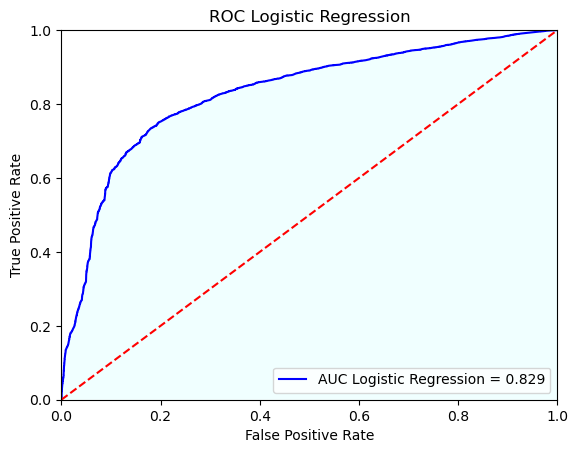

In [108]:
plt.title('ROC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg, tpr_logreg, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

### 2.SGD Classifier Evaluation

In [297]:
sgdclas_prob = sgd.predict_proba(X_test)
probsgdcla = sgdclas_prob[:, 1]
fpr_sgd, tpr_sgd, threshold_sgd = roc_curve(y_test, probsgdcla)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)

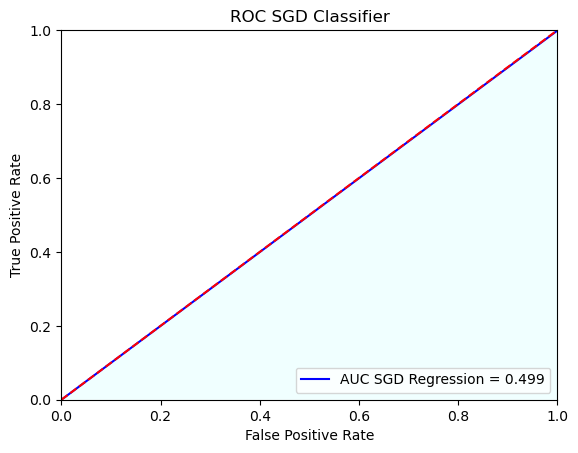

In [299]:
plt.title('ROC SGD Classifier')
plt.plot(fpr_sgd, tpr_sgd, 'blue', label='AUC SGD Regression = {}'.format(round(roc_auc_sgd,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_sgd, tpr_sgd, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

### 3.Decision Tree Classifier Evaluation

In [113]:
dtree_prob = dtree.predict_proba(X_test)
probdtree = dtree_prob[:, 1]
fpr_dtree, tpr_dtree, threshold_dtree = roc_curve(y_test, probdtree)
roc_auc_sgd = auc(fpr_dtree, tpr_dtree)

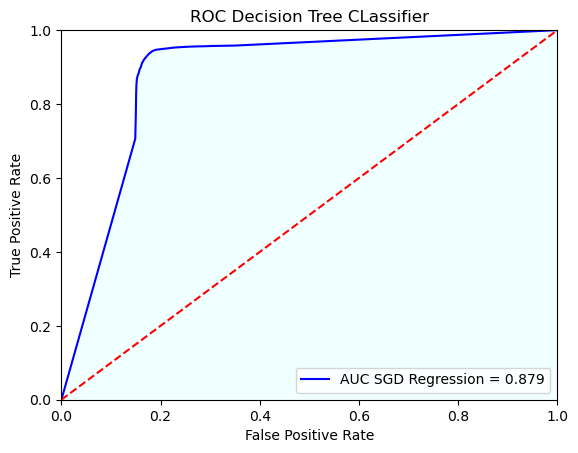

In [114]:
plt.title('ROC Decision Tree CLassifier')
plt.plot(fpr_dtree, tpr_dtree, 'blue', label='AUC SGD Regression = {}'.format(round(roc_auc_sgd,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtree, tpr_dtree, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

### 4.RandomForest classifier Evaluation

In [116]:
rfc_prob = rf.predict_proba(X_test)
probrfc = rfc_prob[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, probrfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

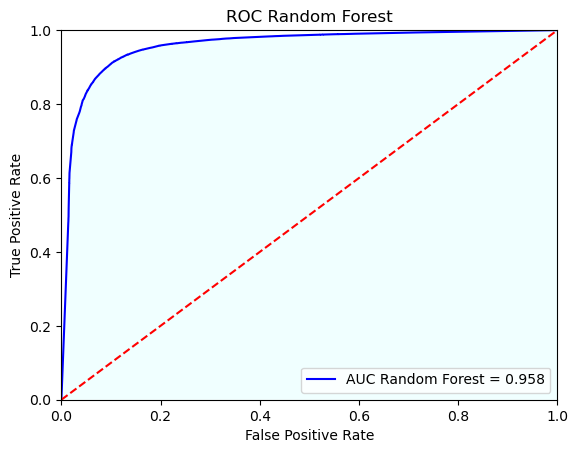

In [117]:
plt.title('ROC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'blue', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

### 5.AdaBoostClassifier Evaluation

In [119]:
abc_prob = adc_bs.predict_proba(X_test)
probabc = abc_prob[:,1]
fpr_abc, tpr_abc, threshold_abc = roc_curve(y_test, probabc)
roc_auc_abc = auc(fpr_abc, tpr_abc)

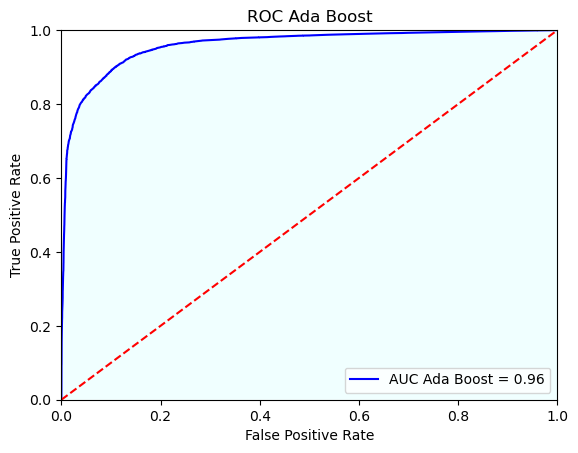

In [120]:
plt.title('ROC Ada Boost')
plt.plot(fpr_abc, tpr_abc, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc, tpr_abc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

### 6.GradientBoostingClassifier

In [122]:
gbc_prob = gbc_bs.predict_proba(X_test)
probgbc = gbc_prob[:,1]
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(y_test, probgbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

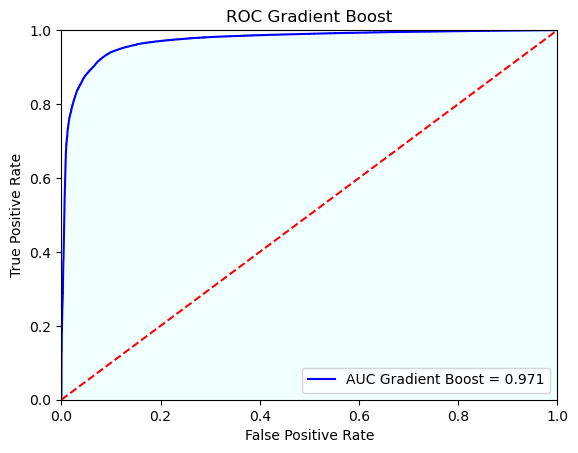

In [123]:
plt.title('ROC Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'blue', label='AUC Gradient Boost = {}'.format(round(roc_auc_gbc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

### 7.KNeighborsClassifier

In [125]:
knn_prob = knn.predict_proba(X_test)
probknn = knn_prob[:,1]
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, probknn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

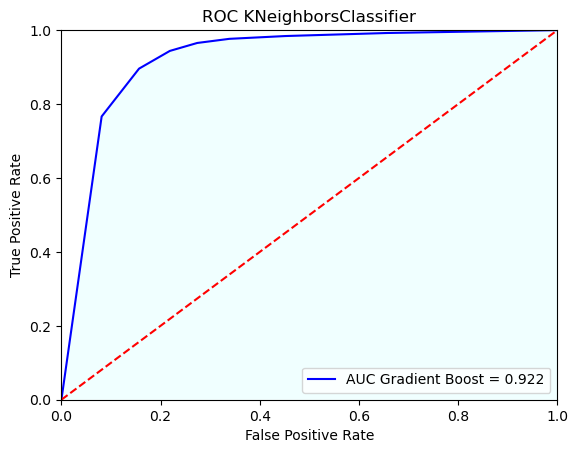

In [126]:
plt.title('ROC KNeighborsClassifier')
plt.plot(fpr_knn, tpr_knn, 'blue', label='AUC Gradient Boost = {}'.format(round(roc_auc_knn,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_knn, tpr_knn, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

## Model Comparation

In [128]:
modelComparation = pd.DataFrame({
    "Logistic Regression": [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred), tplogreg, tnlogreg, fplogreg, fnlogreg],
    "SGD": [accuracy_score(y_test, y_pred_sgd),precision_score(y_test, y_pred_sgd),recall_score(y_test, y_pred_sgd),f1_score(y_test, y_pred_sgd), tpsgd, tnsgd, fpsgd, fnsgd],
    "Decision Tree": [accuracy_score(y_test, y_preds_dtree),precision_score(y_test, y_preds_dtree),recall_score(y_test, y_preds_dtree),f1_score(y_test, y_preds_dtree), tpdtc, tndtc, fpdtc, fndtc],
    "Random Forest": [accuracy_score(y_test, y_pred_rf),precision_score(y_test, y_pred_rf),recall_score(y_test, y_pred_rf),f1_score(y_test, y_pred_rf), tprfc, tnrfc, fprfc, fnrfc],
    "Ada Boost": [accuracy_score(y_test, y_pred_adaboost),precision_score(y_test, y_pred_adaboost),recall_score(y_test, y_pred_adaboost),f1_score(y_test, y_pred_adaboost), tpabc, tnabc, fpabc, fnabc],
    "Gradient Boost": [accuracy_score(y_test, y_pred_gbc),precision_score(y_test, y_pred_gbc),recall_score(y_test, y_pred_gbc),f1_score(y_test, y_pred_gbc), tpgbc, tngbc, fpgbc, fngbc],
    "K-Nearest Neighbor": [accuracy_score(y_test, y_pred_knn),precision_score(y_test, y_pred_knn),recall_score(y_test, y_pred_knn),f1_score(y_test, y_pred_knn), tpknn, tnknn, fpknn, fnknn],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
modelComparation

,Logistic Regression,SGD,Decision Tree,Random Forest,Ada Boost,Gradient Boost,K-Nearest Neighbor
Accuracy Score,0.803015,0.783605,0.917167,0.924178,0.920466,0.937078,0.913760
Precision Score,0.826341,0.784442,0.947247,0.944159,0.946752,0.958200,0.927763
Recall Score,0.948222,0.998626,0.947181,0.960154,0.952190,0.961763,0.965246
F1 Score,0.883096,0.878670,0.947214,0.952089,0.949463,0.959978,0.946133
True Positive,68345.000000,71978.000000,15981.000000,15690.000000,15923.000000,16759.000000,14366.000000
True Negative,5420.000000,4.000000,3802.000000,4093.000000,3860.000000,3024.000000,5417.000000
False Positive,14363.000000,19779.000000,3807.000000,2872.000000,3446.000000,2756.000000,2505.000000
False Negative,3732.000000,99.000000,68270.000000,69205.000000,68631.000000,69321.000000,69572.000000


In [129]:
from imblearn.over_sampling import SMOTE

In [130]:
smote = SMOTE(random_state=42)
Xsmot_train, ysmot_train = smote.fit_resample(X_train, y_train)

In [131]:
# Best Gradient Boost Hyperparameter Tuning
gbc_smot = GradientBoostingClassifier(learning_rate=0.1,max_depth=10, min_samples_split=2 ,n_estimators=100)
gbc_smot.fit(Xsmot_train, ysmot_train)

GradientBoostingClassifier(max_depth=10)

In [132]:
param_random_gbc = {
    'learning_rate': [0.1,0.5],
    'max_depth' : [3, 10],
    'min_samples_split' : [2,5]
}
random_gbc_smot = RandomizedSearchCV(estimator=gbc, param_distributions=param_random_gbc, scoring='roc_auc', n_jobs=-1)
random_gbc_smot.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5],
                                        'max_depth': [3, 10],
                                        'min_samples_split': [2, 5]},
                   scoring='roc_auc')

In [133]:
random_gbc_smot.best_params_

{'min_samples_split': 5, 'max_depth': 10, 'learning_rate': 0.1}

In [134]:
gbc_smot = random_gbc_smot.best_estimator_

In [135]:
gbc_smot_pred = gbc_smot.predict(X_test)

In [136]:
# With Oversampling
print(classification_report(y_test, gbc_smot_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     19783
           1       0.96      0.96      0.96     72077

    accuracy                           0.94     91860
   macro avg       0.91      0.90      0.91     91860
weighted avg       0.94      0.94      0.94     91860



In [137]:
# With Oversampling
tngbcs, fpgbcs, fngbcs, tpgbcs = confusion_matrix(y_test, gbc_smot_pred).ravel()
print(confusion_matrix(y_test, gbc_smot_pred))

[[16762  3021]
 [ 2778 69299]]


In [138]:
modelComparations = pd.DataFrame({
    "Gradient Boost": [accuracy_score(y_test, y_pred_gbc),precision_score(y_test, y_pred_gbc),recall_score(y_test, y_pred_gbc),f1_score(y_test, y_pred_gbc), tpgbc, tngbc, fpgbc, fngbc],
    "Gradient Boost with Smote": [accuracy_score(y_test, gbc_smot_pred),precision_score(y_test, gbc_smot_pred),recall_score(y_test, gbc_smot_pred),f1_score(y_test, gbc_smot_pred), tpgbcs, tngbcs, fpgbcs, fngbcs]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
modelComparations

,Gradient Boost,Gradient Boost with Smote
Accuracy Score,0.937078,0.936871
Precision Score,0.958200,0.958227
Recall Score,0.961763,0.961458
F1 Score,0.959978,0.959840
True Positive,16759.000000,69299.000000
True Negative,3024.000000,16762.000000
False Positive,2756.000000,3021.000000
False Negative,69321.000000,2778.000000


In [139]:
gbc_smot_prob = gbc_smot.predict_proba(X_test)
prob_gbc_smot = gbc_smot_prob[:,1]
fpr_gbcsmot, tpr_gbcsmot, threshold_gbcsmot = roc_curve(y_test, prob_gbc_smot)
roc_auc_gbcsmot = auc(fpr_gbcsmot, tpr_gbcsmot)

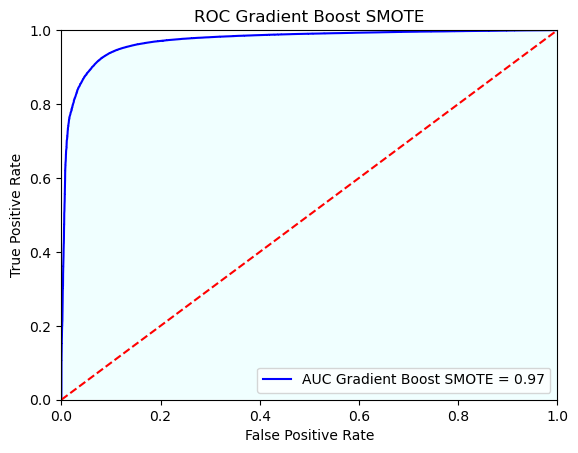

In [140]:
plt.title('ROC Gradient Boost SMOTE')
plt.plot(fpr_gbcsmot, tpr_gbcsmot, 'blue', label='AUC Gradient Boost SMOTE = {}'.format(round(roc_auc_gbcsmot,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbcsmot, tpr_gbcsmot, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [267]:
data

,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,NAICS_44-45,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92
0,84,2.0,60000,48000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,60,2.0,40000,32000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,180,1.0,287000,215250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,120,1.0,517000,387750,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,84,2.0,45000,36000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,60,1.0,25000,12500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
899146,240,1.0,189000,189000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
899157,36,1.0,200000,150000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
899160,60,1.0,85000,42500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [329]:
import joblib
# After training gbc_smot
joblib.dump(gbc_smot, 'sba_loan_model.pkl')

['sba_loan_model.pkl']

In [1]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Load trained model
model = joblib.load('sba_loan_model.pkl')

class LoanPredictorApp:
    def __init__(self, root):
        self.root = root
        self.root.title("SBA Loan Default Predictor")
        self.root.geometry("800x600")

        self.create_inputs()
        self.create_results()
        

    def create_inputs(self):
        input_frame = ttk.LabelFrame(self.root, text="Loan Details")
        input_frame.pack(pady=10, padx=10, fill="x")

        # Numerical inputs
        self.term = ttk.Entry(input_frame)
        ttk.Label(input_frame, text="Loan Term (months):").grid(row=0, column=0, padx=5, pady=5)
        self.term.grid(row=0, column=1, padx=5, pady=5)

        self.gr_appv = ttk.Entry(input_frame)
        ttk.Label(input_frame, text="Gross Approval Amount:").grid(row=1, column=0, padx=5, pady=5)
        self.gr_appv.grid(row=1, column=1, padx=5, pady=5)

        self.SBA_Appv = ttk.Entry(input_frame)
        ttk.Label(input_frame, text="Small Business Administration Approve:").grid(row=2, column=0, padx=5, pady=5)
        self.SBA_Appv.grid(row=2, column=1, padx=5, pady=5)

        self.RevLineCr = ttk.Combobox(input_frame,values=["0", "1"])
        ttk.Label(input_frame, text="RevLineCr:").grid(row=3, column=0, padx=5, pady=5)
        self.RevLineCr.grid(row=3, column=1, padx=5, pady=5)

        self.LowDoc = ttk.Combobox(input_frame,values=["0", "1"])
        ttk.Label(input_frame, text="LowDoc:").grid(row=4, column=0, padx=5, pady=5)
        self.LowDoc.grid(row=4, column=1, padx=5, pady=5)
        # Categorical inputs
        self.new_exist = ttk.Combobox(input_frame, values=["1.0", "2.0"])
        ttk.Label(input_frame, text="Business Type (1=Existing, 2=New):").grid(row=5, column=0, padx=5, pady=5)
        self.new_exist.grid(row=5, column=1, padx=5, pady=5)

        self.naics = ttk.Combobox(input_frame, values=[
            '11', '21', '22', '23', '31-33', '42', '44-45',
            '48-49', '51', '52', '53', '54', '55', '56',
            '61', '62', '71', '72', '81', '92'
        ])
        ttk.Label(input_frame, text="Industry (NAICS Code):").grid(row=6, column=0, padx=5, pady=5)
        self.naics.grid(row=6, column=1, padx=5, pady=5)

        ttk.Button(input_frame, text="Predict", command=self.predict).grid(row=7, columnspan=2, pady=10)
        
    def create_results(self):
        result_frame = ttk.LabelFrame(self.root, text="Prediction Results")
        result_frame.pack(pady=10, padx=10, fill="x")
        
        self.result_text = tk.Text(result_frame, height=4, width=50)
        self.result_text.pack(pady=5, padx=5)
        

        

    def preprocess_input(self):
        try:
            term = float(self.term.get())
            gr_appv = float(self.gr_appv.get())
            sba_appv = float(self.SBA_Appv.get())
            new_exist = float(self.new_exist.get())
            rev_line_cr = int(self.RevLineCr.get())  # Directly get 0 or 1
            low_doc = int(self.LowDoc.get())      # Directly get 0 or 1
            naics_code = self.naics.get()

            # Create a dictionary for the features
            features = {
                'Term': term,
                'GrAppv': gr_appv,
                'SBA_Appv': sba_appv,
                'NewExist': new_exist,
                'RevLineCr': rev_line_cr,
                'LowDoc': low_doc,
            }

            # Add NAICS features dynamically
            for code in ['11', '21', '22', '23', '31-33', '42', '44-45', '48-49', '51', '52', '53', '54', '55', '56', '61', '62', '71', '72', '81', '92']:
                features[f'NAICS_{code}'] = 1 if naics_code == code else 0

            # Create the DataFrame *with the correct column order*
            input_df = pd.DataFrame([features])

            # Get the column order from the training data (very important!)
            training_columns = model.feature_names_in_  # Use feature_names_in_ for GradientBoosting
            input_df = input_df[training_columns] # Reorder columns to match training data
            
            return input_df

        except ValueError:
            raise ValueError("Invalid input. Please enter numerical values for Term, GrAppv, and SBA_Appv.")
        except Exception as e:
            raise Exception(f"An error occurred during preprocessing: {e}")


    def predict(self):
        try:
            input_df = self.preprocess_input()
            proba = model.predict_proba(input_df)[0][1]
            result = "Low Risk (Approve)" if proba < 0.5 else "High Risk (Reject)"

            self.result_text.delete(1.0, tk.END)
            self.result_text.insert(tk.END,
                f"Prediction: {result}\n"
                f"Default Probability: {proba:.2%}\n"
                f"Model Confidence: {(1 - abs(proba-0.5)*2):.1%}"
            )

        except Exception as e:
            messagebox.showerror("Error", str(e))  # Show the specific exception message

if __name__ == "__main__":
    root = tk.Tk()
    app = LoanPredictorApp(root)
    root.mainloop()